In [31]:
import numpy as np
import pandas as pd
import os
import xmltodict
from collections import Counter
import matplotlib.pyplot as plt

In [29]:
img_names, xml_names = GetFileNames()
listing = GetListings(img_names)
Items = Counter(listing).keys()
values = Counter(listing).values()
print(Items,'\n',values)

dict_keys(['with_mask', 'without_mask', 'mask_weared_incorrect']) 
 dict_values([3232, 717, 123])


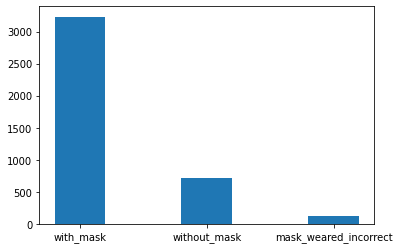

In [32]:
ax2 = plt.bar(Items, list(values), width = 0.4)

In [48]:
total = 3232+717+123
with_mask_per = (list(values)[0] / total) * 100
without_mask_per = (list(values)[1] / total) * 100
mask_incorrect_per = (list(values)[2] / total) * 100
print("With mask:" + str(with_mask_per) + " %")
print("Without mask:" + str(without_mask_per) + " %")
print("Mask weared incorrectly:" + str(mask_incorrect_per) + " %")

With mask:79.3713163064833 %
Without mask:17.608055009823183 %
Mask weared incorrectly:3.020628683693517 %


# Functions

In [20]:
def GetListings(img_names):
    path_annotations="data/annotations/"
    listing=[]
    for i in img_names[:]:
        with open(path_annotations+i[:-4]+".xml") as fd:
            doc=xmltodict.parse(fd.read())
        temp=doc["annotation"]["object"]
        if type(temp)==list:
            for i in range(len(temp)):
                listing.append(temp[i]["name"])
        else:
            listing.append(temp["name"])
    return listing

def GetFileNames():
    img_names=[] 
    xml_names=[] 
    for dirname, _, filenames in os.walk('data/'):
        for filename in filenames:
            if os.path.join(dirname, filename)[-3:]!="xml":
                img_names.append(filename)
            else:
                xml_names.append(filename)
    return img_names, xml_names